# 사용자 리뷰 데이터 분석
**Data Field**

id - Unique ID of each review

sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews

review - Text of the review

In [ ]:
import numpy as np
import pandas as pd
import zipfile


from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

#데이터 압축 풀기
test_dir = 'testData.tsv.zip'
train_dir= 'labeledTrainData.tsv.zip'
with zipfile.ZipFile(train_dir,'r') as z:
    z.extractall()
with zipfile.ZipFile(test_dir,'r') as z:
    z.extractall()

#데이터 불러오기
train = pd.read_csv('labeledTrainData.tsv',header=0, delimiter='\t', quoting=3)
test = pd.read_csv('testData.tsv',header=0,delimiter='\t', quoting=3)
train.head()

#데이터 형태 파악
test.shape
train.info()
train['sentiment'].value_counts()

Saving labeledTrainData.tsv.zip to labeledTrainData.tsv.zip


Saving testData.tsv.zip to testData.tsv.zip
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


1    12500
0    12500
Name: sentiment, dtype: int64

In [ ]:
#데이터 정제
train.head()
train['review'][0][:700] #review 데이터가 html 태그를 포함하고 있음을 알 수 있다

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

In [ ]:
from bs4 import BeautifulSoup

#beautifulsoup를 불러와서 html 태그를 제거
examplel = BeautifulSoup(train['review'][0], 'html5lib')
print(train['review'][0][:700])
examplel.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
import re

#알파벳이 아닌 문자를 공백으로 대체
alpha_only = re.sub('[^a-zA-Z]', ' ', examplel.get_text())
alpha_only

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

In [ ]:
#대소문자를 다르게 인식하는 경우를 방지하기 위해 모든 문자열을 소문자로 변경
lower_case = alpha_only.lower()

#단어 단위로 분해
words = lower_case.split()
print(words[:10])

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with']


In [ ]:
import nltk
from nltk.corpus import stopwords

#분석에 큰 의미가 없는 불용어를 제거
stopwords.words('english')[:10]
words = [w for w in words if not w in stopwords.words('english')]
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [ ]:
from nltk.stem.snowball import SnowballStemmer

#stemmer를 사용하여 어간추출
print('stemmer 적용 전\n',words[:10])
stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]
print('stemmer 적용 후\n',words[:10])

stemmer 적용 전
 ['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary']
stemmer 적용 후
 ['stuff', 'go', 'moment', 'mj', 'start', 'listen', 'music', 'watch', 'odd', 'documentari']


In [ ]:
def data_purification(review):
    # 1. HTML 제거
    review_text = BeautifulSoup(review, 'html.parser').get_text()
    # 2. 알파벳이 아닌 문자를 공백으로 변환 
    alpha_only = re.sub('[^a-zA-Z]', ' ', review)
    # 3. 소문자 변환
    alpha_only.lower()
    # 4. 단어 단위로 분해
    words = alpha_only.split()
    # 5. 불용어 제거
    meaningful_words = [w for w in words if w not in stopwords.words('english')]
    # 6. 어간 추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. 공백으로 구분된 문자열로 결합하여 return
    return (' '.join(stemming_words))

clean_review = data_purification(train['review'][0])
clean_review

'with stuff go moment mj start listen music watch odd documentari watch the wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas some subtl messag mj feel toward press also obvious messag drug bad kay br br visual impress cours michael jackson unless remot like mj anyway go hate find bore some may call mj egotist consent make movi but mj fan would say made fan true realli nice br br the actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord whi want mj dead bad beyond becaus mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music br br lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene br br b

In [ ]:
from multiprocessing import Pool

#데이터 정제를 위한 병렬처리 함수
def apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    workers = kwargs.pop('workers')
    pool = Pool(processes = workers)
    result = pool.map(apply_df, [(d, func, kwargs) for d in np.array_split(df,workers)])
    pool.close()
    return pd.concat(list(result))


In [ ]:
%time clean_train_reviews = apply_by_multiprocessing(train['review'], data_purification, workers=4)

CPU times: user 3.67 s, sys: 757 ms, total: 4.43 s
Wall time: 12min 4s


In [ ]:
%time clean_test_reviews = apply_by_multiprocessing(test['review'], data_purification, workers=4)

CPU times: user 3.49 s, sys: 776 ms, total: 4.26 s
Wall time: 11min 50s


In [ ]:
#중복되는 단어를 제외한 단어 수
train['words'] = clean_train_reviews.apply(lambda x: len(str(x).split()))
train['unique_words'] = clean_train_reviews.apply(lambda x: len(set(str(x).split())))
test['unique_words'] = clean_test_reviews.apply(lambda x: len(set(str(x).split())))
train[:10]

,id,sentiment,review,words,unique_words
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",239,167
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",89,68
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",256,209
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",200,164
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",222,196
5,"""8196_8""",1,"""I dont know why people think this is such a b...",48,38
6,"""7166_2""",0,"""This movie could have been very good, but com...",62,50
7,"""10633_1""",0,"""I watched this video at a friend's house. I'm...",78,64
8,"""319_1""",0,"""A friend of mine bought this film for £1, and...",100,81
9,"""8713_10""",1,"""<br /><br />This movie is full of references....",30,25


리뷰별 단어 평균 값: 135.2732
리뷰별 단어 중간 값: 101.0
리뷰별 고유 단어 평균 값: 101.25816
리뷰별 고유 단어 중간 값: 80.0


Text(0.5, 1.0, 'unique words distribution')

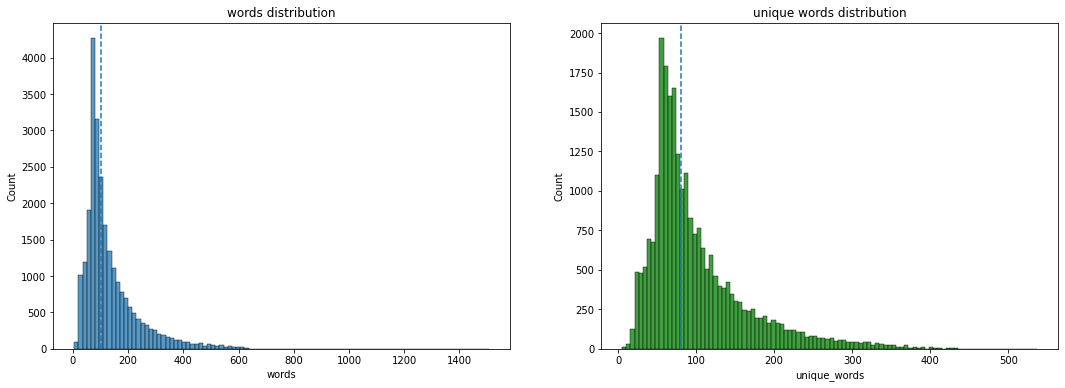

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(18,6)
print('리뷰별 단어 평균 값:', train['words'].mean())
print('리뷰별 단어 중간 값:', train['words'].median())
sns.histplot(train['words'], bins=100, ax=ax[0])
ax[0].axvline(train['words'].median(), linestyle='dashed')
ax[0].set_title('words distribution')

print('리뷰별 고유 단어 평균 값:', train['unique_words'].mean())
print('리뷰별 고유 단어 중간 값:', train['unique_words'].median())
sns.histplot(train['unique_words'], bins=100, color='g', ax=ax[1])
ax[1].axvline(train['unique_words'].median(), linestyle='dashed')
ax[1].set_title('unique words distribution')


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(preprocessor=None, tokenizer=None,stop_words=None, ngram_range=(1,3), analyzer='word',min_df=2,max_features = 20000)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=20000, min_df=2,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
#데이터 벡터화
pipeline = Pipeline([('vect',vectorizer),])
%time train_data_features = pipeline.fit_transform(clean_train_reviews)
train_data_features

CPU times: user 32.7 s, sys: 1.02 s, total: 33.7 s
Wall time: 33.7 s


<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 3089550 stored elements in Compressed Sparse Row format>

In [ ]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

20000


['aag',
 'aaron',
 'abandon',
 'abbi',
 'abbot',
 'abbott',
 'abc',
 'abduct',
 'abhay',
 'abid']

In [ ]:
#벡터화된 피처를 확인
dist = np.sum(train_data_features, axis=0)
for tag, count in zip(vocab, dist):
    print(count,tag)
pd.DataFrame(dist, columns=vocab)

[[ 26  48 290 ...  71  59  41]] aag


,aag,aaron,abandon,abbi,abbot,abbott,abc,abduct,abhay,abid,abigail,abil,abil make,abl,abl get,abl make,abl see,abl watch,abli,aboard,abomin,aborigin,abort,abound,about,about mari,abraham,abraham lincoln,abroad,abrupt,absenc,absent,absolut,absolut aw,absolut brilliant,absolut hilari,absolut love,absolut noth,absolut perfect,absolut sens,...,yourself,youth,youtub,yr,yugoslavia,yup,yuppi,yuzna,yvonn,zabriski,zabriski point,zane,zani,zatoichi,zealand,zelah,zelah clark,zelda,zenia,zero,zero day,zero star,zeta,zeta jone,zhang,zizek,zodiac,zodiac killer,zoe,zombi,zombi br,zombi br br,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu
0,26,48,290,30,29,30,125,55,28,28,26,562,25,1259,53,31,53,35,27,37,83,69,92,63,245,27,93,29,38,137,118,83,1850,29,35,42,93,154,29,27,...,28,363,61,25,28,27,32,25,25,40,36,70,38,33,47,43,34,28,31,390,44,33,38,37,37,85,45,25,27,1331,27,27,50,37,87,161,31,71,59,41


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#랜덤포레스트 분류 모델 
rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state=2021) #트리 100개 
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2021, verbose=0,
                       warm_start=False)

In [ ]:
#데이터 훈련
%time rf.fit(train_data_features, train['sentiment'])

CPU times: user 1min 33s, sys: 76.5 ms, total: 1min 33s
Wall time: 47.8 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2021, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score

%time score = np.mean(cross_val_score(rf, train_data_features, train['sentiment'], cv = 10, scoring='roc_auc'))
score

CPU times: user 11.3 s, sys: 1.29 s, total: 12.6 s
Wall time: 6min 51s


0.927837792

In [ ]:
#테스트 데이터 벡터화
%time test_data_features = pipeline.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

CPU times: user 8.61 s, sys: 38 ms, total: 8.65 s
Wall time: 8.65 s


In [ ]:
#데이터 예측
result = rf.predict(test_data_features)
result[:10]

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
#예측 결과를 데이터프레임으로 나타냄
output = pd.DataFrame(data={'id':test['id'], 'sentiment':result})
output.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",1
4,"""12128_7""",1


In [ ]:
output.to_csv('submit.csv', index=False, quoting=3)
output_sentiment = output['sentiment'].value_counts()
print(np.abs(output_sentiment[0] - output_sentiment[1]))
output_sentiment

98


1    12549
0    12451
Name: sentiment, dtype: int64

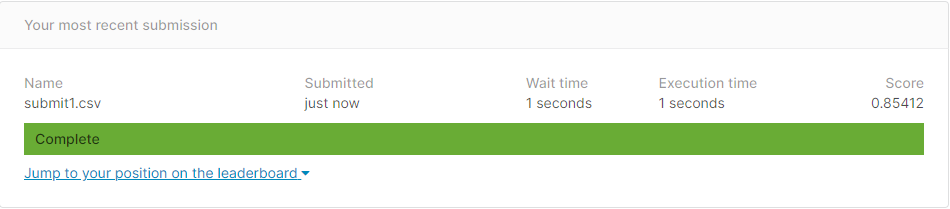